In [1]:
%matplotlib notebook
import os
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re
import pandas as pd
def read_gdat(file):
    """Read tabular data from BNG gdat or cdat or similar file. Data needs to be 
       whitespace delimited and first line of file contains whitespace delimited
       column names.
    Args:
        file: Text file containing the data.
    Raises:
    Returns:
        gdat: DataFrame containing the data from the file with column names matching 
        the columns of the input file.
    """
    f=open(file)
    # Get column names from first line of file
    line=f.readline()
    names=re.split('\s+',(re.sub('#','',line)).strip())
    gdat= pd.read_table(f,sep='\s+',header=None,names=names)
    f.close
    return(gdat)

In [36]:
# Enter the folder where the gdat file/files are in
gdats_folder = 'C:\\Users\\Akhlore\\Dropbox\\Faeder_lab\\Workshop2019\\gdats'
# Let's switch to that folder so we don't have to feed in absolute paths all the time
os.chdir(gdats_folder)
# Get the list of files in the folder
fold_list = os.listdir(gdats_folder)
# Filter out everything except files ending in '.gdat'
gdats = sorted(list(filter(lambda x: x.endswith(".gdat"), fold_list)))
# Load in each file using the function defined above
loaded_gdats = list(map(read_gdat, gdats))
# Check if we have more than 1 file, if so merge the pandas data frames together
# Note: This seems to change the column names, please print the data frame and check the names
if len(loaded_gdats) > 1:
    ctr = 1
    for igdat in range(len(loaded_gdats)-1):
        if ctr == 1:
            all_df = pd.merge(loaded_gdats[igdat], loaded_gdats[igdat+1], on=["time"], suffixes=("_%i"%(ctr),"_%i"%(ctr+1)))
        else:
            all_df = pd.merge(all_df, loaded_gdats[igdat+1], on=["time"], suffixes=("_%i"%(ctr),"_%i"%(ctr+1)))
        ctr+=1
    # Note if you don't have overlapping columns you could have just used this:
    # all_df = reduce(lambda l,r: pd.merge(l,r,on=["time"]), loaded_gdats)
else:
    all_df = loaded_gdats[0]

In [39]:
# We can take a look at the column names
print(all_df.columns)

Index(['time', 'Atot_1', 'Btot_1', 'Atot_2', 'Btot_2', 'Atot_3', 'Btot_3',
       'Atot_4', 'Btot_4', 'Atot', 'Btot'],
      dtype='object')


In [40]:
# And see a sample of the data structure we have
all_df.head()

,time,Atot_1,Btot_1,Atot_2,Btot_2,Atot_3,Btot_3,Atot_4,Btot_4,Atot,Btot
0,0.0,4.0,18.0,4.0,18.0,4.0,18.0,4.0,18.0,4.0,18.0
1,100.0,5.0,5.0,3.0,5.0,6.0,4.0,2.0,2.0,5.0,4.0
2,200.0,5.0,4.0,1.0,3.0,3.0,2.0,10.0,6.0,2.0,6.0
3,300.0,5.0,5.0,4.0,4.0,6.0,2.0,2.0,6.0,3.0,4.0
4,400.0,3.0,6.0,4.0,2.0,4.0,3.0,1.0,5.0,17.0,2.0


<IPython.core.display.Javascript object>


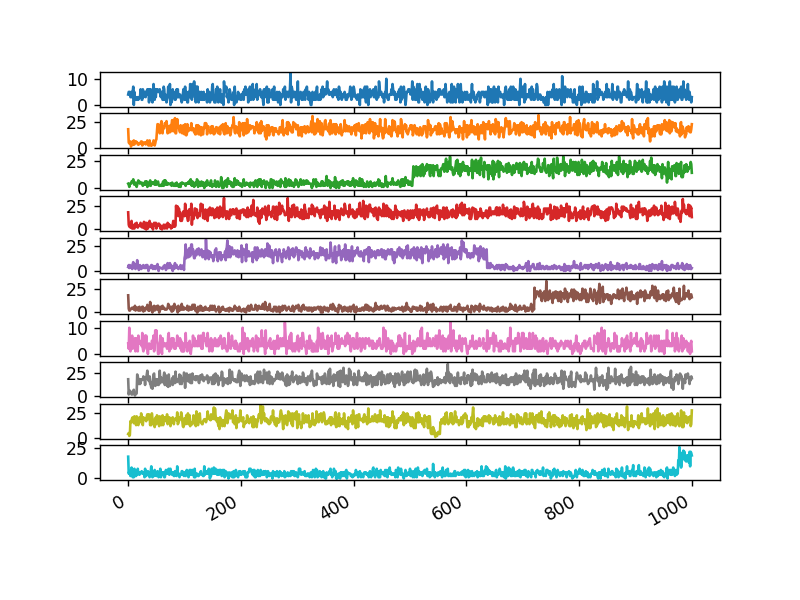

In [42]:
# This will plot each time series in separate plots, this might get 
# unreadble if you have too many time series
axs = all_df.filter(like="tot").plot.line(subplots=True, legend=False)

# Note, please press the stop interactivity button once you run this 
# if you want to plot anything after

<IPython.core.display.Javascript object>


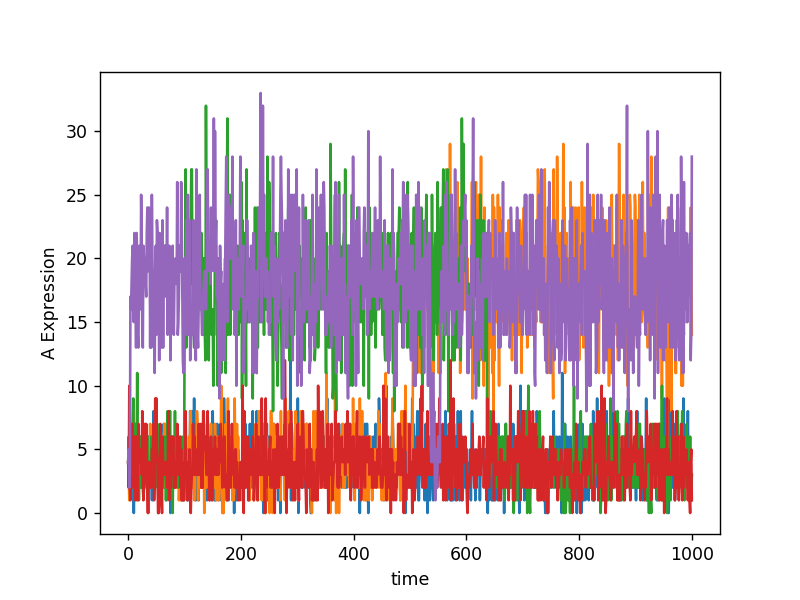

In [43]:
# And filter out certain data and plot all of them in a single plot
ax = all_df.filter(like="Atot").plot(legend=False)
ax.set_xlabel("time")
_ = ax.set_ylabel("A Expression")

<IPython.core.display.Javascript object>


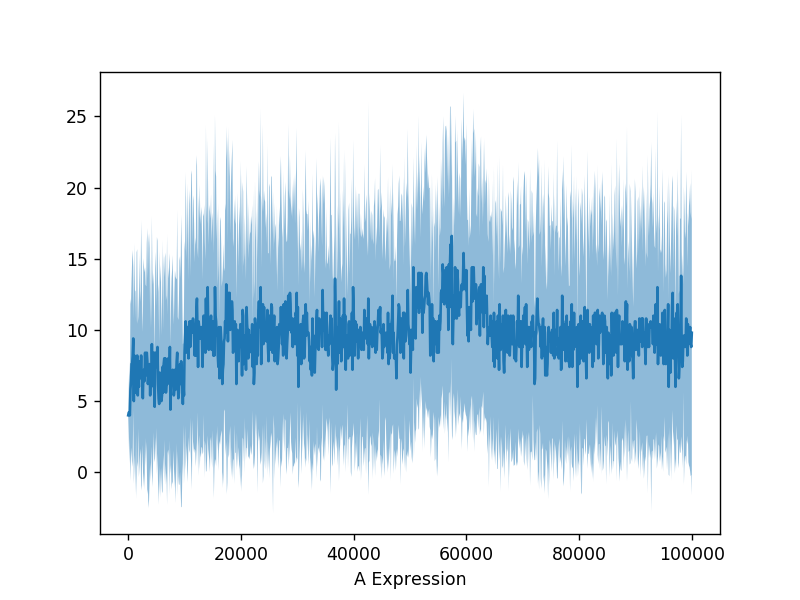

In [44]:
# We can also use matplotlib on it's own to get more specific plots
# here we are plotting the mean of a subset of our data and then 
# shading the +- standard deviation region

# First calculate these values and put them into arrays
a_mean = all_df.filter(like="Atot").mean(axis=1)
a_std = all_df.filter(like="Atot").std(axis=1)

# Now we use matplotlib on its own
plt.plot(all_df.time, a_mean)
plt.fill_between(all_df.time, a_mean+a_std, a_mean-a_std, alpha=0.5)
plt.xlabel("time")
_ = plt.xlabel("A Expression")

<IPython.core.display.Javascript object>


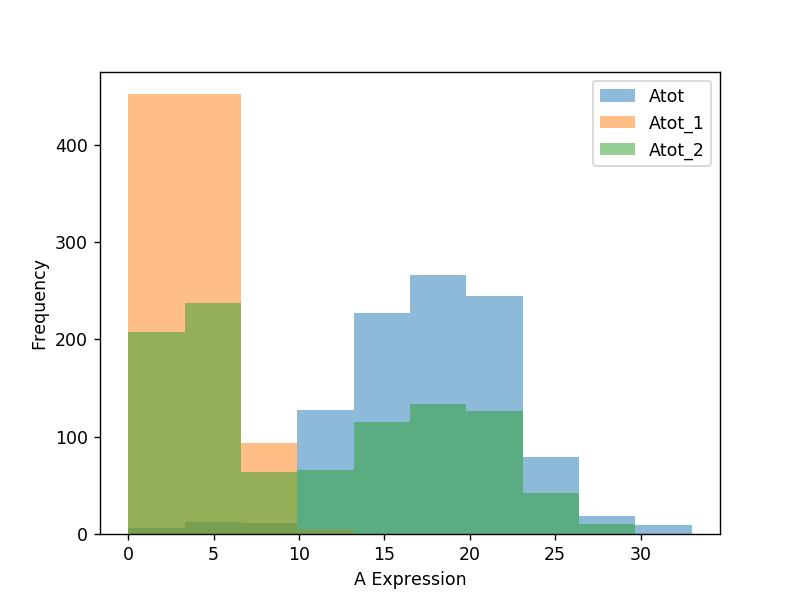

In [48]:
# Pandas still contain many interesting ways to visualize the data
ax = all_df[["Atot","Atot_1","Atot_2"]].plot.hist(alpha=0.5)
ax.set_xlabel("A Expression")
_ = ax.set_ylabel("Frequency")

<IPython.core.display.Javascript object>


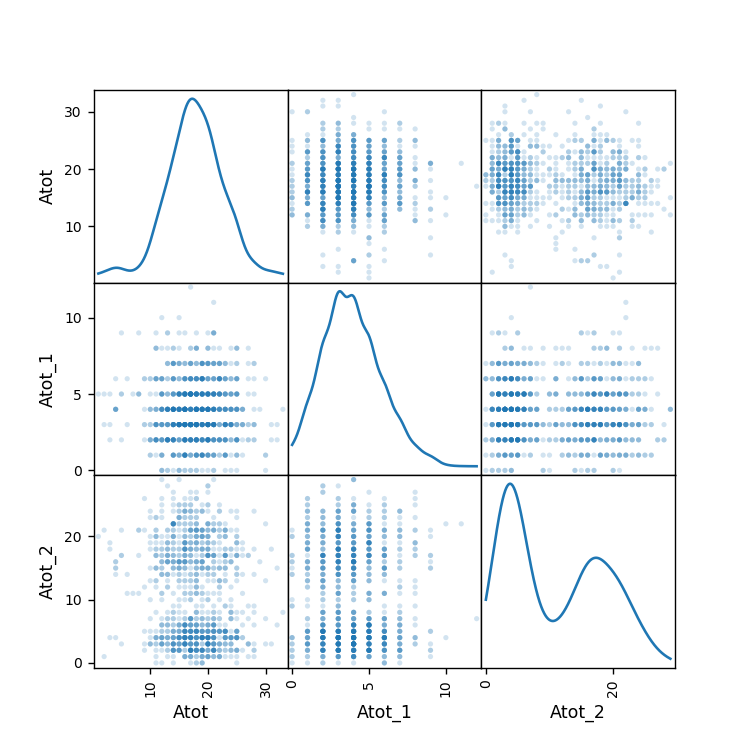

In [51]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(all_df[["Atot","Atot_1","Atot_2"]], alpha=0.2, figsize=(6, 6), diagonal='kde')